In [7]:
%matplotlib notebook

In [8]:
import numpy as np
np.set_printoptions(linewidth=120)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
plt.ioff()

import seaborn as sns
sns.set()

In [9]:
from regressors.polynomial import PolynomialRegressor, XYPair
import analysis_tools as tools

## Data preparation

In [10]:
results  = np.load('raw/wolfpack/run_test.npy')
print(results.shape)

(1, 11, 11, 2)


In [11]:
results = np.mean(results, axis=3)
results = np.mean(results, axis=0)
print(results)

[[ 1174.    145.    828.    646.   1356.    106.    642.    -22.   1133.   -105.    762. ]
 [  538.    456.    833.     31.    748.    546.    -39.    972.    944.    860.    713. ]
 [  630.    178.   1076.    315.    872.    329.   1134.     44.    723.    -65.    362. ]
 [  579.    876.    -81.    853.   1080.   -769.   1148.    931.    196.   -905.    697. ]
 [ -203.    654.    173.    642.    140.    757.5   171.    591.     88.    -65.   -242. ]
 [  498.    945.   1044.    859.    635.    259.   -105.    384.    319.    595.    456. ]
 [  279.    515.    725.    299.    155.   -502.    316.   -279.    378.    666.    469. ]
 [  581.     40.     75.     60.    430.    575.    668.    347.   -121.    614.    350. ]
 [  853.    297.   1142.   -413.    756.   -144.    226.   1022.   1074.    141.   -104. ]
 [  532.   1127.    711.   -111.    938.   -158.    678.    118.    760.    193.     58. ]
 [ 1013.    533.   1007.    572.    908.    564.    337.    512.    624.    190.    232. ]

In [12]:
print(np.mean(results))
print(np.std(results))

453.665289256
433.624973113


<IPython.core.display.Javascript object>


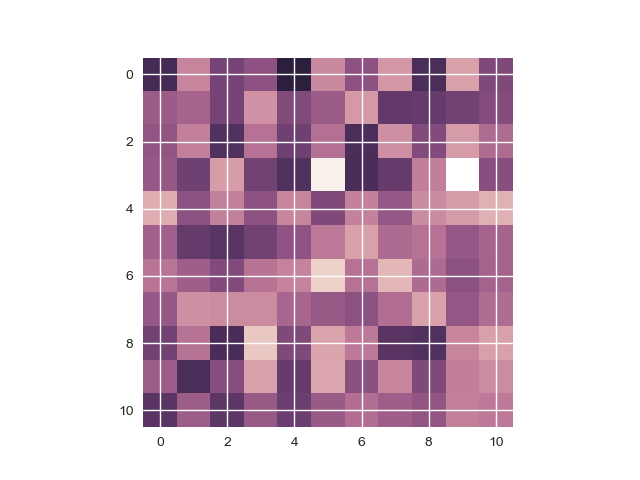

In [13]:
cmap =sns.cubehelix_palette(light=1, as_cmap=True)
plt.imshow(results, cmap=cmap, interpolation='nearest')
plt.show()

In [14]:
X = []
Y = []
for i in range(11):
    for j in range(11):
        X.append([i/10, j/10])
        Y.append(results[i][j])
X = np.array(X)
Y = np.array(Y).reshape(121, 1)

In [17]:
model = PolynomialRegressor(test_degrees=30, eps=0.01, early_stopping=True, patience=3)

In [18]:
model.fit(XYPair(X, Y), verbose=1)

degree: 0  ||  r_sqaured: 0.0
degree: 1  ||  r_sqaured: 0.045926992046573245
degree: 2  ||  r_sqaured: 0.09330895539609241
degree: 3  ||  r_sqaured: 0.09685682104666626
degree: 4  ||  r_sqaured: 0.11129830272148689
degree: 5  ||  r_sqaured: 0.14735904986911308
degree: 6  ||  r_sqaured: 0.1983896011956666
degree: 7  ||  r_sqaured: 0.26048604981716117
degree: 8  ||  r_sqaured: 0.3028851500431118
degree: 9  ||  r_sqaured: 0.347821870986904
degree: 10  ||  r_sqaured: 0.5607836207952231
degree: 11  ||  r_sqaured: 0.5990543423570525
degree: 12  ||  r_sqaured: 0.673037046212194
degree: 13  ||  r_sqaured: 0.7126723593093387
degree: 14  ||  r_sqaured: 0.7551706160061717
degree: 15  ||  r_sqaured: 0.8063378613631733
degree: 16  ||  r_sqaured: 0.89866072010357
degree: 17  ||  r_sqaured: 0.9574505852596132
degree: 18  ||  r_sqaured: 0.9663876715207801
degree: 19  ||  r_sqaured: 0.9994954050888691
degree: 20  ||  r_sqaured: 0.9999991807330912
degree: 21  ||  r_sqaured: 0.9999998308082713
degree: 22

In [19]:
model.print_func()

1173.919777*1 + 57203181.677827*x0 + -40912767.377264*x1 + -1514778016.378166*x0^2 + 102805698.782376*x0*x1 + 1059491966.169926*x1^2 + 15638776968.732752*x0^3 + -2388472444.294002*x0^2*x1 + -306039104.266737*x0*x1^2 + -10589889173.572823*x1^3 + -82915033073.006119*x0^4 + 23691423406.757175*x0^3*x1 + 747020251.971287*x0^2*x1^2 + 2843581347.655852*x0*x1^3 + 53669006827.821953*x1^4 + 243825819313.381287*x0^5 + -117777365644.023376*x0^4*x1 + -4057067371.785646*x0^3*x1^2 + -942548948.183200*x0^2*x1^3 + -13229242366.123257*x0*x1^4 + -148553911364.463318*x1^5 + -382528919164.992615*x0^6 + 319154428747.755005*x0^5*x1 + -31336339873.256840*x0^4*x1^2 + 16699724926.379465*x0^3*x1^3 + -50069201719.560738*x0^2*x1^4 + 38714406019.202843*x0*x1^5 + 217292272945.989105*x1^6 + 224108938894.835052*x0^7 + -439715755632.188904*x0^6*x1 + 167276293734.670563*x0^5*x1^2 + 270068996096.860352*x0^4*x1^3 + 307469756559.834961*x0^3*x1^4 + 227653257797.007568*x0^2*x1^5 + -72445145301.737717*x0*x1^6 + -134580512988.

<IPython.core.display.Javascript object>


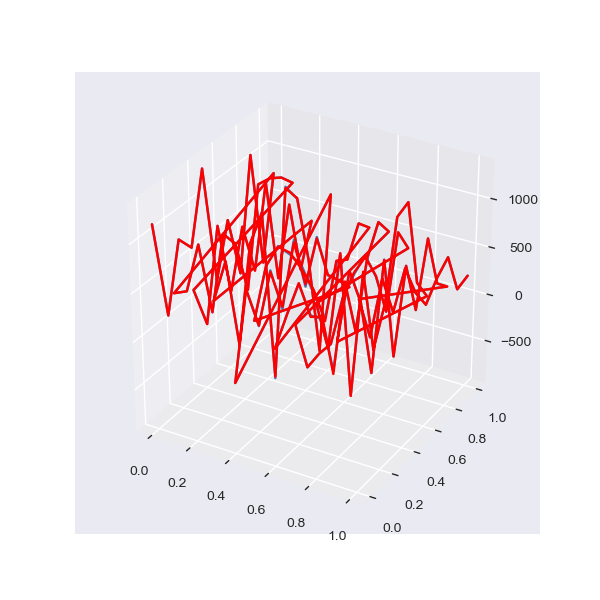

In [20]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(X.T[0], X.T[1], Y.flatten())
#ax.plot(X.T[0], X.T[1], Y_upper_bound.flatten(), c='b')
#ax.plot(X.T[0], X.T[1], Y_lower_bound.flatten(), c='b')
ax.plot(X.T[0], X.T[1], model.predict().flatten(), c='r')
plt.show()

In [27]:
n = 11
X_domain = np.linspace(0, 1, n)
X = np.zeros((4, n, n))
X[0] = np.full((n, n), 0)
X[1] = np.full((n, n), 0)
X[2], X[3] = np.meshgrid(X_domain, X_domain)
X

array([[[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]],

       [[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 

In [28]:
Y = results
Y

array([[ 1174. ,   145. ,   828. ,   646. ,  1356. ,   106. ,   642. ,   -22. ,  1133. ,  -105. ,   762. ],
       [  538. ,   456. ,   833. ,    31. ,   748. ,   546. ,   -39. ,   972. ,   944. ,   860. ,   713. ],
       [  630. ,   178. ,  1076. ,   315. ,   872. ,   329. ,  1134. ,    44. ,   723. ,   -65. ,   362. ],
       [  579. ,   876. ,   -81. ,   853. ,  1080. ,  -769. ,  1148. ,   931. ,   196. ,  -905. ,   697. ],
       [ -203. ,   654. ,   173. ,   642. ,   140. ,   757.5,   171. ,   591. ,    88. ,   -65. ,  -242. ],
       [  498. ,   945. ,  1044. ,   859. ,   635. ,   259. ,  -105. ,   384. ,   319. ,   595. ,   456. ],
       [  279. ,   515. ,   725. ,   299. ,   155. ,  -502. ,   316. ,  -279. ,   378. ,   666. ,   469. ],
       [  581. ,    40. ,    75. ,    60. ,   430. ,   575. ,   668. ,   347. ,  -121. ,   614. ,   350. ],
       [  853. ,   297. ,  1142. ,  -413. ,   756. ,  -144. ,   226. ,  1022. ,  1074. ,   141. ,  -104. ],
       [  532. ,  1127. ,   

In [29]:
Y_stats = tools.get_stats(Y)
Y_stats

ArrayStats(min=-905.0, ave=453.66528925619832, max=1356.0, range=2261.0)

In [30]:
Y = tools.normalize(Y, Y_stats)
Y

array([[ 0.91950464,  0.46439628,  0.76647501,  0.68597966,  1.        ,  0.44714728,  0.68421053,  0.39053516,
         0.90137107,  0.35382574,  0.73728439],
       [ 0.63821318,  0.60194604,  0.76868642,  0.41397612,  0.73109244,  0.64175144,  0.38301636,  0.83016364,
         0.81777974,  0.78062804,  0.71561256],
       [ 0.67890314,  0.4789916 ,  0.87616099,  0.53958425,  0.78593543,  0.54577621,  0.90181336,  0.41972579,
         0.72003538,  0.37151703,  0.56037152],
       [ 0.65634675,  0.78770456,  0.36444051,  0.77753207,  0.87793012,  0.06015038,  0.90800531,  0.81203008,
         0.48695268,  0.        ,  0.70853605],
       [ 0.31048209,  0.68951791,  0.47678019,  0.68421053,  0.46218487,  0.73529412,  0.47589562,  0.66165414,
         0.4391862 ,  0.37151703,  0.29323308],
       [ 0.62052189,  0.81822203,  0.86200796,  0.78018576,  0.68111455,  0.51481645,  0.35382574,  0.57010172,
         0.54135338,  0.66342326,  0.60194604],
       [ 0.5236621 ,  0.62804069,  0.720

In [31]:
model = tools.PolynomialRegression(X, Y)

In [32]:
pol_model = model.process(degree=1)
pol_model.print_func()
print(pol_model.r_squared)

0.683771*1 + -0.000000*x0 + -0.000000*x1 + -0.122618*x2 + -0.043097*x3
0.0459269920466


<IPython.core.display.Javascript object>


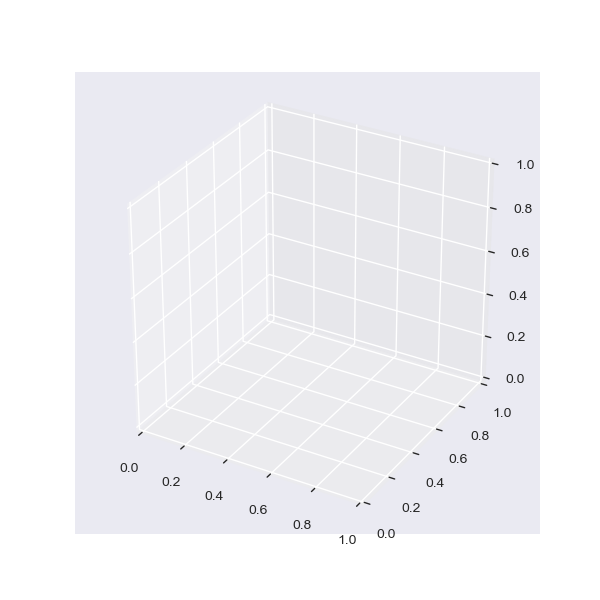

<IPython.core.display.Javascript object>


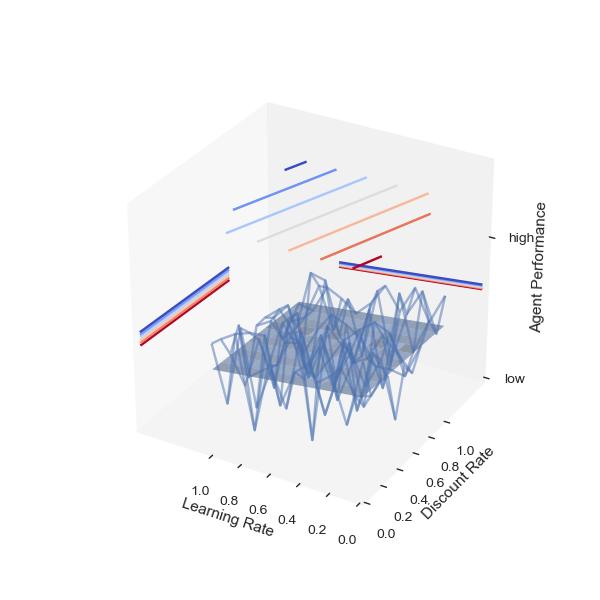

In [33]:
ax = tools.plot_3d_normed(model, degree=1, offsets=(1.5, 1.5, 1.5))
plt.show()

<IPython.core.display.Javascript object>


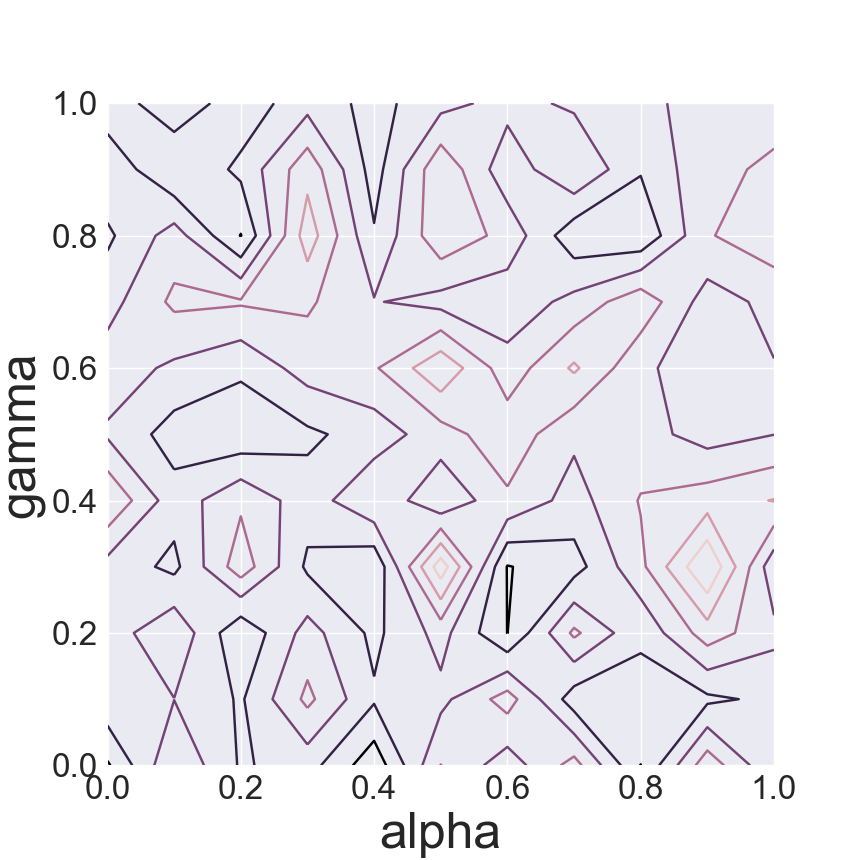

In [35]:
cmap = sns.cubehelix_palette(dark=0, as_cmap=True)
fig, ax = plt.subplots(figsize=(8.6, 8.6))
ax.contour(X[2], X[3], Y, cmap=cmap)
ax.set_xlabel('alpha')
ax.set_ylabel('gamma')
ax.xaxis.label.set_size(36)
ax.yaxis.label.set_size(36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig('plots/test_results.png', bbox_inches='tight', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


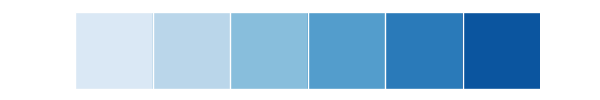

In [85]:
sns.palplot(sns.color_palette("Blues"))
plt.show()